In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Basics of deep learning and neural networks


### Coding the forward propagation algorithm

In [6]:
input_data = np.array([3, 5])
weights = {'node_1': np.array([ 4, -5]), 'output': np.array([2, 7]), 'node_0': np.array([2, 4])}

In [7]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


### The Rectified Linear Activation Function

In [8]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


### Applying the network to many observations/rows of data

In [18]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_1': np.array([ 4, -5]), 'output': np.array([2, 7]), 'node_0': np.array([2, 4])}

In [19]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input )

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input )

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


### Coding how weight changes affect accuracy

In [20]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [-1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


### Multi-layer neural networks

In [12]:
input_data = np.array([3, 5])
weights = {'output': np.array([2, 7]), 'node_1_0': np.array([-1,  2]), 'node_0_0': np.array([2, 4]), 'node_1_1': np.array([1, 2]), 'node_0_1': np.array([ 4, -5])}


In [13]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


## Optimizing a neural network with backward propagation

### Scaling up to multiple data points


In [21]:
target_actuals = [1, 3, 5, 7]
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
weights_0 = {'node_1': np.array([1, 2]), 'output': np.array([1, 1]), 'node_0': np.array([2, 1])}
weights_1 = {'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5]), 'node_0': np.array([2, 1])}

In [22]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


### Calculating slopes

In [29]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [30]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = target - preds

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[-14 -28 -42]


### Improving model weights

In [31]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated =  preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


### Making multiple updates to weights

In [61]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [60]:
# Define predict_with_network()
def predict_with_network(input_data, weights):
    
    # Return model output
    return(relu((input_data * weights).sum()))

def get_slope(input_data, target, weights):
    
    # Calculate the predictions: preds
    preds = (weights * input_data).sum()

    # Calculate the error: error
    error = target - preds

    # Calculate the slope: slope
    slope = input_data * error * 2
    
    return slope

def get_mse(input_data, target, weights):
        
    # Append prediction to model_output_1
    model_output = predict_with_network(input_data, weights)

    # Calculate the mean squared error for model_output
    mse = model_output - target
    
    return mse   

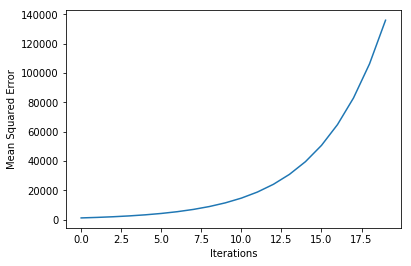

In [64]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Building deep learning models with keras


### Specifying a model

In [66]:
df = pd.read_csv('hourly_wages.csv')
predictors = df.iloc[:, 1:].values
target = df.iloc[:, 0].values
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [68]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols, )))

# Add the second layer
model.add(Dense(32, activation = 'relu'))

# Add the output layer
model.add(Dense(1))

Using TensorFlow backend.


### Compiling the model

In [69]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


### Fitting the model

In [70]:
# Fit the model
model.fit(predictors, target)

Epoch 1/1
534/534 [==============================] - 0s 194us/step - loss: 134.0509


### Last steps in classification models

In [22]:
df = pd.read_csv('titanic_all_numeric.csv')
predictors = df.iloc[:, 1:].values[:600]
pred_data = df.iloc[:, 1:].values[600:]
n_cols = predictors.shape[1]
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [16]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
# # import tensorflow as tf 

# Convert the target to categorical: target
target = to_categorical(df.iloc[:600, 0])

# Set up the model
model = Sequential()

# model.add(Activation(tf.nn.softmax))

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
600/600 [==============================] - 1s 1ms/step - loss: 3.8682 - acc: 0.5533


### Making predictions

In [17]:
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:, 1]

# print predicted_prob_true
print(predicted_prob_true)

[3.80801052e-01 2.25354801e-03 7.80433655e-01 3.72728391e-05
 3.97576950e-02 2.88141239e-03 2.50266166e-03 5.71891904e-01
 4.42042887e-01 3.46771538e-01 1.08020101e-02 1.80262316e-03
 9.12975147e-03 1.83780084e-03 5.49081538e-04 4.53384310e-01
 2.99488567e-03 4.41335998e-02 1.15346409e-01 1.56345014e-02
 2.13896446e-02 6.04643106e-01 1.69204623e-01 3.67654413e-02
 2.59030402e-01 1.23512189e-04 1.71299178e-06 5.10503411e-01
 8.68348591e-03 1.82923803e-03 1.67628144e-07 3.59235378e-06
 2.21606717e-01 2.29690166e-04 3.22031468e-01 1.20869856e-02
 1.35194848e-03 1.22789070e-01 3.14138047e-02 1.78314932e-02
 4.87922765e-02 4.76521343e-01 8.71141925e-02 8.70456994e-01
 1.34050578e-01 8.30756903e-01 6.51325658e-02 8.07923498e-04
 2.04591174e-03 1.38729466e-02 2.25354801e-03 5.94125628e-01
 4.23655920e-02 1.30240910e-03 4.01697420e-02 6.97313726e-01
 2.25354801e-03 4.22869110e-03 6.79538026e-02 7.11396337e-01
 7.17150211e-01 8.65284383e-05 1.38975820e-03 3.54993274e-04
 4.47487645e-02 8.071375

## Fine-tuning keras models

### Changing optimization parameters

In [20]:
def get_new_model(n_cols):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = (n_cols, )))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [21]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model(n_cols)
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

Epoch 1/1
600/600 [==============================] - 0s 332us/step - loss: 2.4249


Testing model with learning rate: 0.010000

Epoch 1/1
600/600 [==============================] - 0s 353us/step - loss: 2.1944


Testing model with learning rate: 1.000000

Epoch 1/1
600/600 [==============================] - 0s 391us/step - loss: 6.1170


### Evaluating model accuracy on validation dataset

In [25]:
df = pd.read_csv('titanic_all_numeric.csv')
predictors = df.iloc[:, 1:].values
target = to_categorical(df.survived)
n_cols = predictors.shape[1]

In [26]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split = 0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/1
623/623 [==============================] - 0s 632us/step - loss: 0.8509 - acc: 0.6517 - val_loss: 0.6091 - val_acc: 0.6940


### Early stopping: Optimizing the optimization

In [27]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 2)

# Fit the model
model.fit(predictors, target, epochs = 30, validation_split = 0.3, callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 681us/step - loss: 1.2884 - acc: 0.5891 - val_loss: 0.7631 - val_acc: 0.6754
Epoch 2/30
623/623 [==============================] - 0s 52us/step - loss: 0.7687 - acc: 0.6019 - val_loss: 0.5745 - val_acc: 0.7201
Epoch 3/30
623/623 [==============================] - 0s 65us/step - loss: 0.6957 - acc: 0.6693 - val_loss: 0.5554 - val_acc: 0.7201
Epoch 4/30
623/623 [==============================] - 0s 56us/step - loss: 0.6245 - acc: 0.6517 - val_loss: 0.5166 - val_acc: 0.7761
Epoch 5/30
623/623 [==============================] - 0s 58us/step - loss: 0.6084 - acc: 0.6726 - val_loss: 0.5151 - val_acc: 0.7425
Epoch 6/30
623/623 [==============================] - 0s 69us/step - loss: 0.5806 - acc: 0.7063 - val_loss: 0.6326 - val_acc: 0.6828
Epoch 7/30
623/623 [==============================] - 0s 61us/step - loss: 0.5961 - acc: 0.6886 - val_loss: 0.5053 - val_acc: 0.7649
Epoch 8/30
623/623 [==

### Experimenting with wider networks

Text(0, 0.5, 'Validation score')

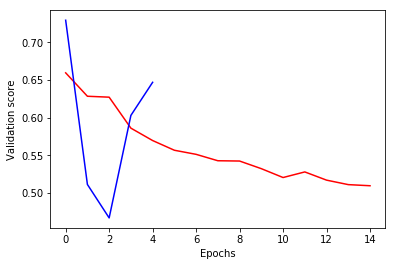

In [30]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_1
model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation = 'relu', input_shape=input_shape))
model_1.add(Dense(10, activation = 'relu'))

# Add the output layer
model_1.add(Dense(2, activation = 'softmax'))

# Compile model_1
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation = 'relu', input_shape=input_shape))
model_2.add(Dense(100, activation = 'relu'))

# Add the output layer
model_2.add(Dense(2, activation = 'softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')

### Adding layers to a network

Text(0, 0.5, 'Validation score')

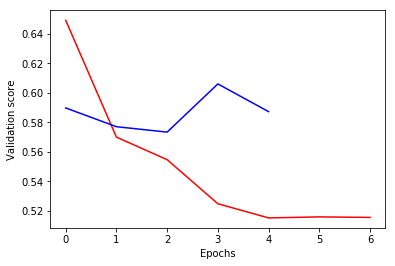

In [32]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_1
model_1 = Sequential()

# Add the first hidden layers
model_1.add(Dense(50, activation = 'relu', input_shape = input_shape))

# Add the output layer
model_1.add(Dense(2, activation = 'softmax'))

# Compile model_2
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation = 'relu', input_shape = input_shape))
model_2.add(Dense(50, activation = 'relu'))
model_2.add(Dense(50, activation = 'relu'))

# Add the output layer
model_2.add(Dense(2, activation = 'softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')

### Building your own digit recognition model

In [41]:
df = pd.read_csv('mnist.csv', header = None)
y = to_categorical(df.iloc[:, 0])
X = df.iloc[:, 1:].values

In [42]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation = 'relu', input_shape = (784, )))

# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
model.fit(X, y, validation_split = 0.3)

Train on 1400 samples, validate on 601 samples
Epoch 1/1
1400/1400 [==============================] - 1s 583us/step - loss: 12.4821 - acc: 0.2079 - val_loss: 10.6603 - val_acc: 0.3145
